In [138]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow import keras
from keras import layers
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from skimage.transform import resize
import h5py
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import os
from PIL import Image
from IPython import display
import cv2
import sys

In [154]:
!pip freeze > requriements_rozpoznawanie_emocji.txt

In [156]:
from IPython.display import FileLink
FileLink('requriements_rozpoznawanie_emocji.txt')

/kaggle/working/requriements_rozpoznawanie_emocji.txt

In [139]:
# !pip freeze -m > requriements_emocje.txt

In [140]:
!ls /kaggle/input/ads-files-extended/facebook

ReklamFacebookaOrlen2.PNG  ReklamaFacebookOrlen.PNG  ReklamaFacebookTVP.png
ReklamaFacebookOrange.png  ReklamaFacebookPekao.png


In [141]:
def extract_face(filename, required_size=(224, 224)):
    
    if filename.lower().endswith(".png"):
        pixels = convert_png_to_jpg(filename)
    else:
        pixels = pyplot.imread(filename)
    
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    #TODO if enough time, do this for multiple faces
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height

    # FACE EXTRACTION
    face = pixels[y1:y2, x1:x2]


    # RESIZE IMAGE TO THE MODEL SIZE
    image = Image.fromarray(face)
    image = image.resize(required_size)

    face_array = asarray(image)
    return face_array

In [142]:
model =load_model('/kaggle/input/face-expression-model/model_weights.h5')

In [143]:
predict_emotion = '/kaggle/input/ads-files-extended/facebook/ReklamaFacebookPekao.png'

Predykcja emocji twarzy dla reklamy:


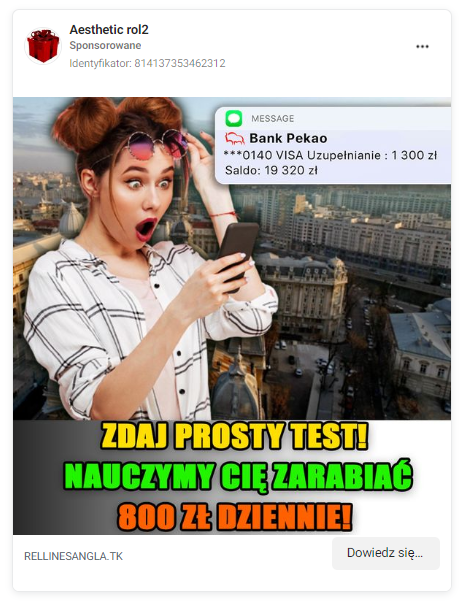

In [144]:
print("Predykcja emocji twarzy dla reklamy:")
display.Image(predict_emotion)

In [145]:

imagePath = sys.argv[1]

image = cv2.imread(predict_emotion)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=5,
    minSize=(30, 30)
)

#to do change for list of faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]
    cv2.imwrite('extracted_face.jpg', roi_color)

status = cv2.imwrite('faces_detected.jpg', image)

In [146]:
!ls

151151_faces.jpg  __notebook_source__.ipynb  faces_detected.jpg       tmp.jpg
8282_faces.jpg	  extracted_face.jpg	     requriements_emocje.txt


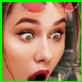

In [147]:
display.Image("extracted_face.jpg")

In [148]:
# [0,1,2,3,4,5,6] ["Złość","Smutek","Strach","Wesoły","Neutralny","Zniesmaczony","Zaskoczony"]
#open image
img = cv2.imread('extracted_face.jpg',cv2.IMREAD_GRAYSCALE)
# set dims to fit model
img.shape

(82, 82)

In [149]:
dim = (48, 48)
#resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
dim = (48, 48)
#resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#reshape
img=img.reshape(1,48,48,1)
#predict


In [150]:
pred_classes = [np.argmax(model.predict(img))]
class_names = ["Złość","Smutek","Strach","Wesoły","Neutralny","Zniesmaczony","Zaskoczony"]
pred_class_names = list(map(lambda x: class_names[x], pred_classes))


Rozpoznana emocja ['Zaskoczony']


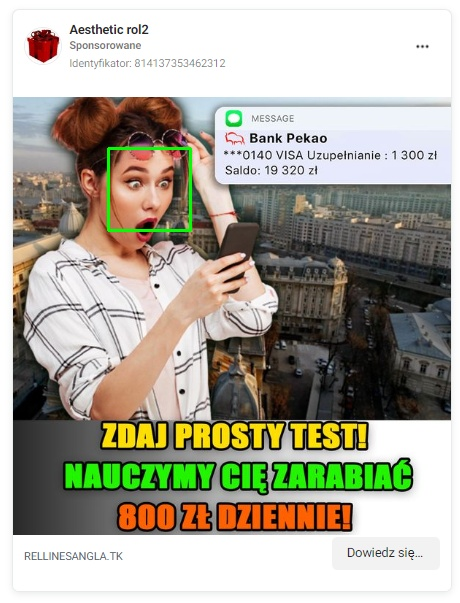

In [152]:
print("Rozpoznana emocja", pred_class_names)
display.Image("faces_detected.jpg")